In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image

In [2]:
train_dir=r'E:\Deep Learning\CNN\Computer Vision Project\Dataset\train'
test_dir=r'E:\Deep Learning\CNN\Computer Vision Project\Dataset\validation'

In [3]:
train_datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rescale=1/255,
                                 validation_split=0.2)
validation_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(48,48),batch_size=64,color_mode='grayscale',
                                                 class_mode='categorical',subset='training')
validation_generator=validation_datagen.flow_from_directory(directory=test_dir,target_size=(48,48),batch_size=64,
                                                            color_mode='grayscale',class_mode='categorical',subset='validation')

Found 1522 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


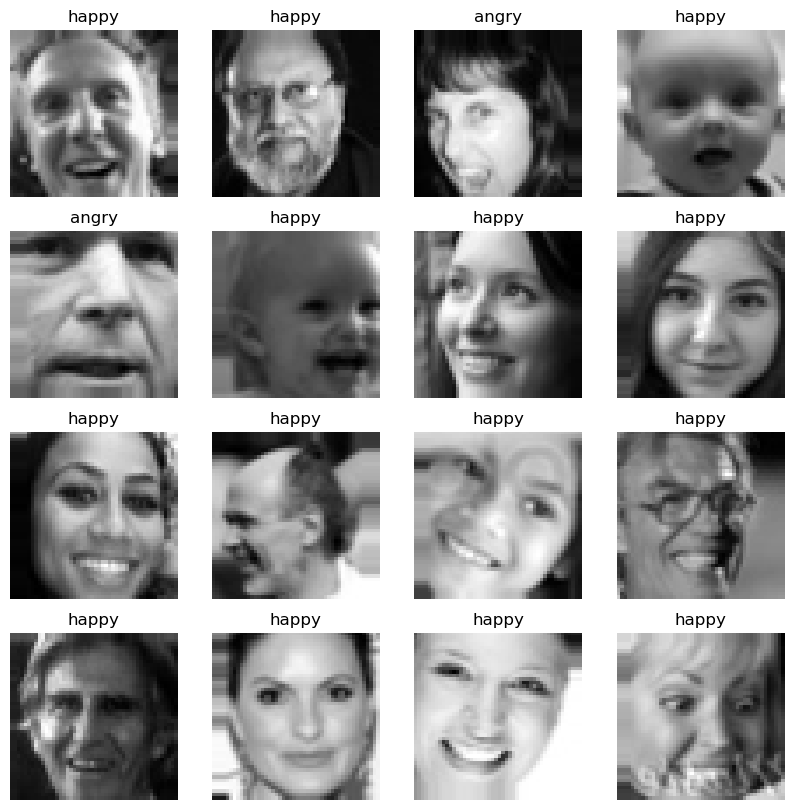

In [5]:
batch=next(train_generator)
fig, axes= plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i],cmap='gray')
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_generator.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
plt.show()

In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,858 (7.64 MB)

 Trainable params: 2,001,666 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [9]:
checkpoint_callback=ModelCheckpoint(filepath='model.weights.h5',monitor='val_accuracy',save_best_only=True,
                                    save_weights_only=True,mode='max',verbose=1)
history=model.fit(train_generator,batch_size=64,epochs=10,validation_data=validation_generator,callbacks=[checkpoint_callback])

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7459 - loss: 1.0485
Epoch 1: val_accuracy improved from -inf to 0.62731, saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7475 - loss: 1.0391 - val_accuracy: 0.6273 - val_loss: 0.6712
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8119 - loss: 0.5138
Epoch 2: val_accuracy did not improve from 0.62731
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8132 - loss: 0.5108 - val_accuracy: 0.6134 - val_loss: 0.6740
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8566 - loss: 0.4418
Epoch 3: val_accuracy did not improve from 0.62731
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8567 - loss: 0.4405 - val_accuracy: 0.3449 - val_loss: 0.7714
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8719 - loss: 0.3834
Epoch 4: val_accuracy did not improve from 0.62731
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8717 - loss: 0.3834 - val_accu

In [10]:
validation_loss,validation_acc=model.evaluate(validation_generator)
print('validation loss:',validation_loss,'\t validation accuracy:',validation_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.3407 - loss: 1.7138
validation loss: 1.7783859968185425 	 validation accuracy: 0.3263888955116272


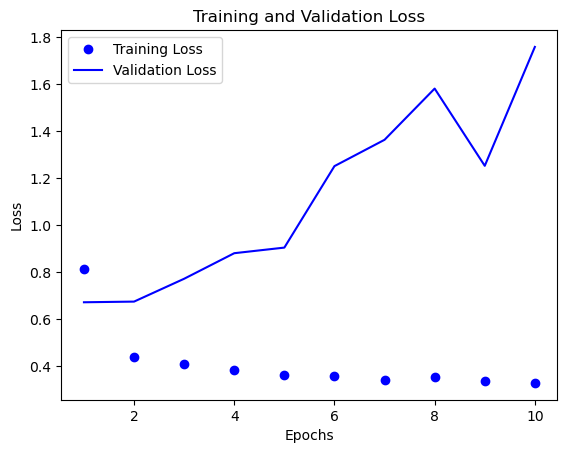

In [12]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

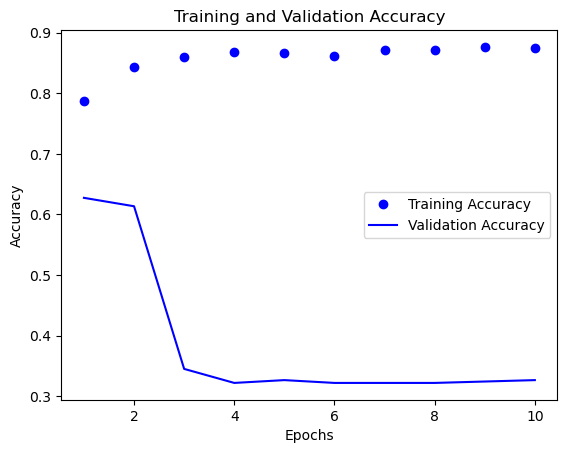

In [13]:
train_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step


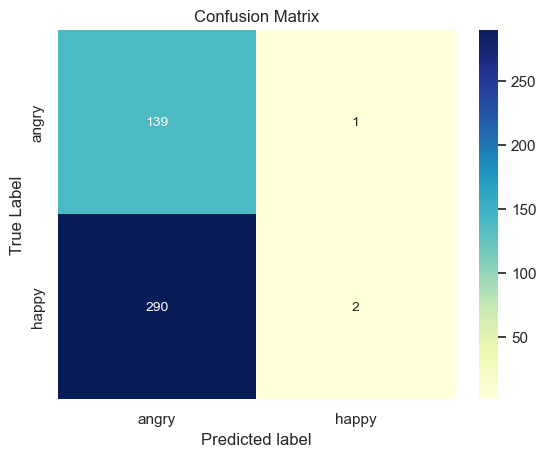

In [15]:
validation_labels=validation_generator.classes
validation_pred_probs=model.predict(validation_generator)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)
cm=confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':10},cmap='YlGnBu',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
img_path = r"E:\Deep Learning\CNN\Image1.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  


prediction = model.predict(img_array) 


label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" Emotion predicted of this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
 Emotion predicted of this image is angry


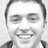

In [17]:
img

In [18]:
img_path = r"E:\Deep Learning\CNN\Image2.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  


prediction = model.predict(img_array) 


label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" Emotion predicted of this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 Emotion predicted of this image is angry


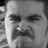

In [19]:
img